# 🏎️ APEX – F1 Lap Time Prediction using Linear Regression

This notebook implements Linear Regression from scratch using Gradient Descent
to predict Formula 1 lap times.

The goal is to deeply understand how learning rate, convergence,
and feature limitations affect model behavior.


## 🔑 Key Learnings

- Linear Regression predicts an average trend, not exact lap times
- Single-feature models underfit noisy real-world data
- Feature scaling is critical for stable gradient descent
- Comparing with sklearn helps validate correctness
- Feature engineering matters more than model complexity


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/raw/lap_times.csv")
df = df[['lap','milliseconds']]
df = df[df['milliseconds'] < df['milliseconds'].quantile(0.99)]
df.head()

,lap,milliseconds
0,1,98109
1,2,93006
2,3,92713
3,4,92803
4,5,92342


In [4]:
X = df['lap'].values
Y = df['milliseconds'].values

In [5]:
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

In [6]:
X.shape, Y.shape

((583190, 1), (583190, 1))

In [7]:
X_mean = X.mean()
X_std = X.std()
X_scaled = (X - X_mean) / X_std

In [8]:
w = 0.0
b = 0.0 # y = wx + b

In [9]:
#Cost Function

def cost_function(X, Y, w, b):
    m = len(Y)
    Y_pred = w*X + b

    cost = (1 / (2*m)) * np.sum((Y_pred - Y) ** 2)
    return cost

In [10]:
#Gradient Descent

def gradient_descent(X, Y, w, b, learning_rate, iterations):
    m = len(Y)
    cost_history = [] #empty list

    for i in range(iterations):
        Y_pred = w * X + b

        dw = (1/m) * np.sum((Y_pred - Y) * X)
        db = (1/m) * np.sum(Y_pred - Y)

        w = w - learning_rate * dw
        b = b - learning_rate * db

        cost = cost_function(X, Y, w, b)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")

    return w, b, cost_history
    

In [11]:
learning_rate = 0.01
iterations = 1000

w_final, b_final, cost_history = gradient_descent(
    X_scaled, Y, w, b, learning_rate, iterations 
)

Iteration 0, Cost: 4350120739.944276
Iteration 100, Cost: 671187192.4881741
Iteration 200, Cost: 178284871.97595704
Iteration 300, Cost: 112245979.33699523
Iteration 400, Cost: 103398109.9732472
Iteration 500, Cost: 102212675.31270654
Iteration 600, Cost: 102053851.16232191
Iteration 700, Cost: 102032571.9542938
Iteration 800, Cost: 102029720.97292095
Iteration 900, Cost: 102029338.9993636


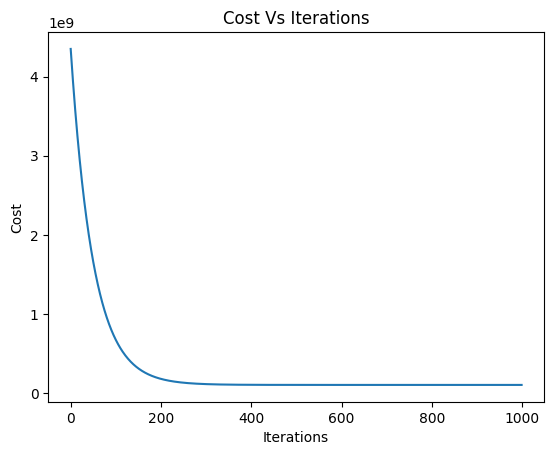

In [12]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Vs Iterations")
plt.show()

In [13]:
Y_pred = w_final * X_scaled + b_final

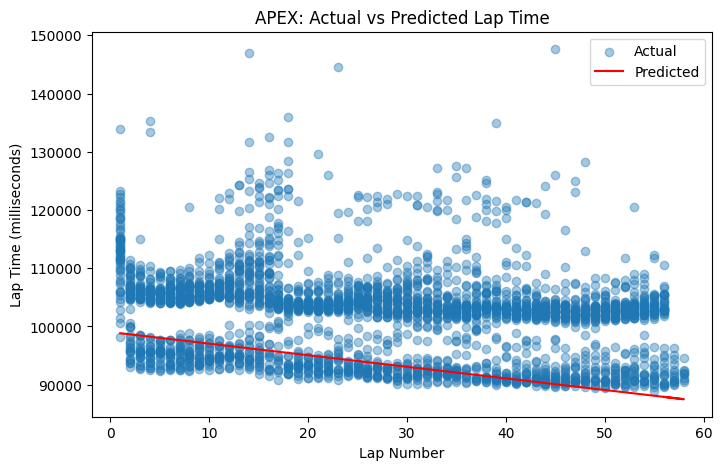

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(X[:3000], Y[:3000], alpha=0.4, label="Actual")
plt.plot(X[:3000], Y_pred[:3000], color="red", label="Predicted")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (milliseconds)")
plt.title("APEX: Actual vs Predicted Lap Time")
plt.legend()
plt.show()

In [15]:
learning_rate = 0.1
iterations = 1000

w_final, b_final, cost_history = gradient_descent(
    X_scaled, Y, w, b, learning_rate, iterations 
)

Iteration 0, Cost: 3612848668.3672576
Iteration 100, Cost: 102029282.38217293
Iteration 200, Cost: 102029279.90526208
Iteration 300, Cost: 102029279.90526207
Iteration 400, Cost: 102029279.90526207
Iteration 500, Cost: 102029279.90526207
Iteration 600, Cost: 102029279.90526207
Iteration 700, Cost: 102029279.90526207
Iteration 800, Cost: 102029279.90526207
Iteration 900, Cost: 102029279.90526207


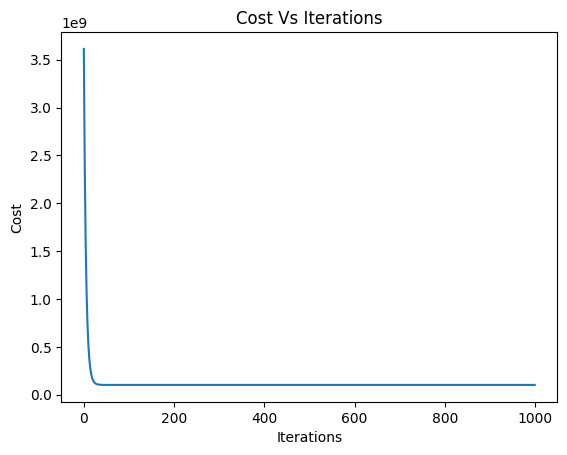

In [16]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Vs Iterations")
plt.show()

In [17]:
learning_rate = 0.001
iterations = 1000

w_final, b_final, cost_history = gradient_descent(
    X_scaled, Y, w, b, learning_rate, iterations 
)

Iteration 0, Cost: 4427709848.429287
Iteration 100, Cost: 3643242614.0259337
Iteration 200, Cost: 3001039430.817287
Iteration 300, Cost: 2475300546.5960736
Iteration 400, Cost: 2044905024.4169748
Iteration 500, Cost: 1692562233.9722085
Iteration 600, Cost: 1404117220.999364
Iteration 700, Cost: 1167982048.760196
Iteration 800, Cost: 974670266.4078628
Iteration 900, Cost: 816415802.0606985


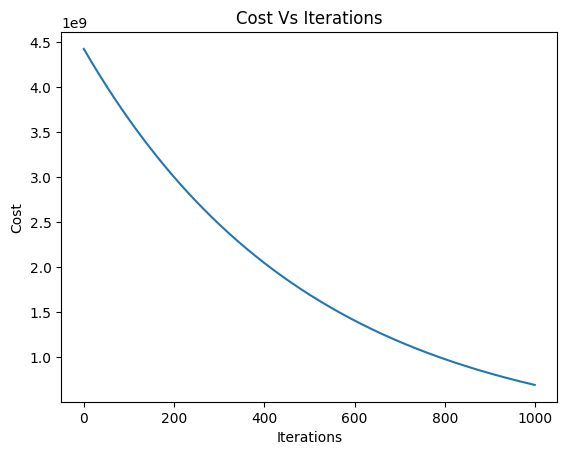

In [19]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Vs Iterations")
plt.show()